### Data Wrangling Activity 9

In [3]:
# Importing lubraries needed for assignment

import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [5]:
# The text instructs us to script out ignoring errors
ctx = ssl.create_default_context() 
ctx.check_hostname = False 
ctx.verify_mode = ssl.CERT_NONE

In [7]:
# Importing website data to variables
toplOOurl = 'https://www.gutenberg.org/browse/scores/top' 
response = requests.get(toplOOurl)

In [9]:
# Using a function to check the status of the web request from above
def status_check(r):
        if r.status_code==200:
            print("success")
            return 1
        else:
            print("Failed")
            return -1

# Calling function to check the response variable

status_check(response)

success


1

In [14]:
# Now let's strip out the website content

contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

# now let's strip out all of the HTML href tags into a list variable

list_links=[]

# Here's a loop to pull the href tags

for link in soup.find_all('a'):
    #print(link.get('href'))
    list_links.append(link.get('href'))
    
# Checking what's inside the list_links lists

list_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [17]:
# looping the list_links data to strip out book numbers, and adding them (append) to the booknum list

booknum=[]

for i in range(19,119):
    link=list_links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        booknum.append(int(n[0]))
        
print("\nThe file numbers for the top 100 ebooks on Gutenberk are shown below\n"+"-"*70)
print(booknum)
    


The file numbers for the top 100 ebooks on Gutenberk are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1513, 2641, 145, 37106, 16389, 100, 67979, 394, 6761, 2701, 2160, 4085, 6593, 5197, 1259, 1342, 84, 11, 70059, 174, 98, 70060, 70055, 28054, 1661, 64317, 1952, 345, 5200, 1232, 5827, 2554, 4300, 1400, 24637, 1184, 42108, 1080, 1260, 20228, 67098, 408, 2600, 3206, 2542, 17607, 6130, 2591, 76, 74, 58585, 219, 43, 30254, 4363, 844, 205, 768, 1998, 45, 996, 514, 1497, 5740, 8581, 27827, 120, 70052, 25344, 10007, 1399, 2680, 47629, 46, 158, 161, 26184, 2814, 135, 244, 33283, 36, 7370, 10676, 1727, 37134]


In [49]:
# We have a ton of random spacing from the HTML code

print(soup.text[:50])






Top 100 | Project Gutenberg





















In [59]:
# Now let's remove redundent spacing in the booknum list data. 
# in the activity we are dumping the book titles into a new list

list_titles_temp=[]

start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

for i in range(100):
    list_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [60]:
# second loop
list_titles=[]

# formatting was off, reconstructing loop

for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',list_titles_temp[i]).span()
    list_titles.append(list_titles_temp[i][id1:id2])

# printing the titles

for l in list_titles:
    print(l)



Top 
Top 
Top 
Top 


Top 

Romeo and Juliet by William Shakespeare 
A Room with a View by E
Middlemarch by George Eliot 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Complete Works of William Shakespeare by William Shakespeare 
The Blue Castle
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
Moby Dick
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
My Life 
Twenty Years After by Alexandre Dumas 
Pride and Prejudice by Jane Austen 
Frankenstein
Alice
Hidden blood by W
The Picture of Dorian Gray by Oscar Wilde 
A Tale of Two Cities by Charles Dickens 
Paul Bunyan by James Stevens 
Satan
The Brothers Karamazov by Fyodor Dostoyevsky 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Great Gatsby by F
The Yellow Wallpaper by Charlotte Perkins Gilman 
Dracula by Bram Stoker 
Metamorphosis by Franz Kafka 
The Prince by Niccol
The Problems of Philosophy by Bertrand Russell 
Crime and

### Data Wrangling Activity 10

In [61]:
import json

In [67]:
# created the APIkeys.json file hosted on my local machine

#loading key into variable

with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']
    
# assigning the begining URL to a variable for loop construction later

serviceurl = 'http://www.omdbapi.com/?'

# variable for the API key portion of the URL

apikey = '&apikey='+omdbapi

In [114]:
# utility function to construct json file with headers

def print_json(json_data):
    list_keys=['Title','Year','Released','Runtime','Genre','Director', 'Writer', 'Actors','Plot','Language','Country','Awards','Ratings','Metascore','imdbRating','imdbVotes','imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
            print("-"*50)

In [121]:
# utitlity function to downlaod poster of the movie

def save_poster(json_data): 
    import os
    title = json_data['Title'] 
    poster_url = json_data['Poster']
    poster_file_extension=poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read() 
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    filename=savelocation+str(title)+'.'+poster_file_extension 
    f=open(filename,'wb') 
    f.write(poster_data) 
    f .close

In [138]:
def search_movie(title): 
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey 
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url) 
        data = uh.read()
        json_data=json.loads(data)
              
        if json_data['Response']=='True': 
            print_json(json_data)
            
            if json_data['Poster']!='':
                save_poster(json_data)
            
        else:
            print("Error encountered: ",json_data['Error'])
              
    except urllib.error.URLError as e:
            print(f"ERROR: {e.reason}")
    

In [123]:
# Now let's test the search_movie function

search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=c09ec066
--------------------------------------------------
Title: Titanic
--------------------------------------------------
Year: 1997
--------------------------------------------------
Released: 19 Dec 1997
--------------------------------------------------
Runtime: 194 min
--------------------------------------------------
Genre: Drama, Romance
--------------------------------------------------
Director: James Cameron
--------------------------------------------------
Writer: James Cameron
--------------------------------------------------
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
--------------------------------------------------
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
--------------------------------------------------
Language: English, Swedish, Italian, French
------------------------------------------

In [139]:
# Testing error code, not working. The error must be something other than N/A
# Confirmed titanic poster image is in my directory file!
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=c09ec066
Error encountered:  Movie not found!


### Return result from API call

In [129]:
# I have not heard back from twitter in 9 days, using another API call for this portion of the assignment. 
# hardcoding a city for this exercise

import requests

api_key = "ce0efa199278d7b175aca39427dc7292"
city = "Omaha"  

url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={api_key}"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(f"Current temperature in {city}: {data['main']['temp']} Degrees")
    print(f"Current weather conditions: {data['weather'][0]['description']}")
else:
    print(f"Error: {response.status_code} - {response.reason}")


Current temperature in Omaha: 45.46 Degrees
Current weather conditions: few clouds


### Visualizations

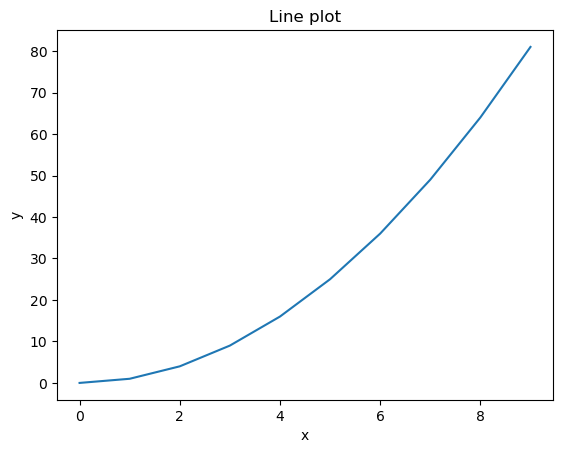

In [131]:
# Line plot

import matplotlib.pyplot as plt

x = range(10)
y = [i**2 for i in x]

plt.plot(x, y)

plt.title("Line plot")
plt.xlabel("x")
plt.ylabel("y")

plt.show()


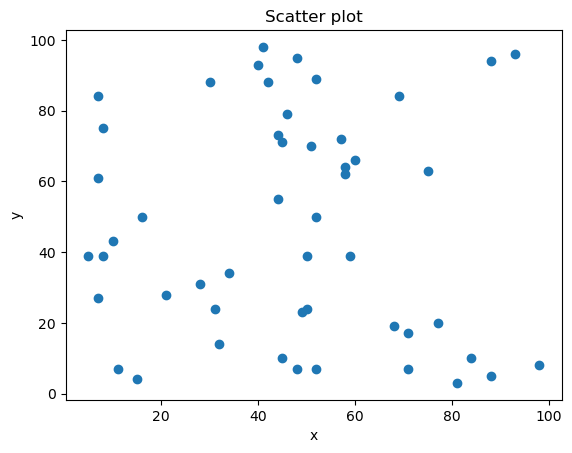

In [132]:
# Scatter Plot

import random

x = [random.randint(1, 100) for i in range(50)]
y = [random.randint(1, 100) for i in range(50)]

plt.scatter(x, y)

plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")

plt.show()


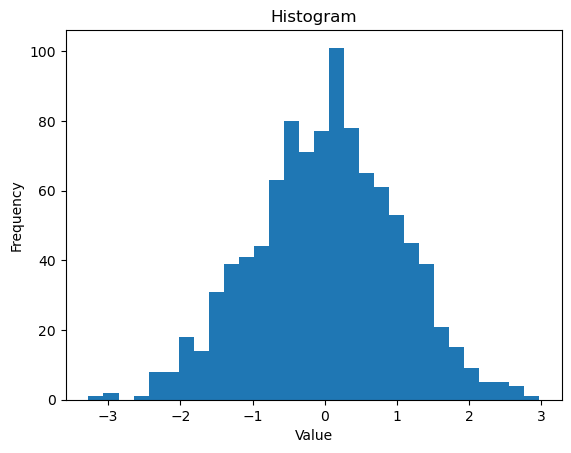

In [133]:
# Histogram

import random

data = [random.normalvariate(0, 1) for i in range(1000)]

plt.hist(data, bins=30)

plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()
